In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
from sklearn.utils import resample

# 2-1. 임의표본추출과 표본편향
- 무작위 표본 추출 과정인 '**임의표본추출**'을 통해서 얻은 표본을 '**단순임의표본**'이라고 한다.
- 이렇게 얻은 표본을 다시 모집단에 포함시키는 과정을'**복원추출**'이라고 하며, 복원시키지 않고 다시 다시 표본을 추출하면 '**비복원추출'**이라고 한다.
- '표본편향'이 발생하면 '**비임의(nonrandom)**' 표본이 추출되므로, 편향되지 않는 표본을 추출하는 것이 매우 중요하다

# 2-2. 선택 편향
- 선택 편향 : 데이터를 선택하는 방식 때문에 생기는 편향. '단순임의표본'도 이를 피해갈 수는 없다.
- Data snooping : 뭔가 흥미로운 것을 차아 광범위하게 데이터를 탐색하는 것
- Vast search effect(방대한 검색 효과) : 광범위한 데이터를 고려하는 모델링에서 생기는 편향 혹은 비재현성. 중복 데이터나 너무 많은 예측 변수를 고려하는 경우 발생
- Ex. 비임의표본추출, Data cherry picking, 특정 효과를 강조하기 위한 time interval selection, '기댓값'을 얻을 경우 실험을 중단하는 것

# 2-2-1. 평균으로의 회귀
- 두 변수간 상관이 아주 크지 않을 경우, 한 변수에서 극단치를 보인 사례가 다른 변수에서는 덜 극단적인, 즉 평균에 가까운 값을 보이는 통계적 성질
- Ex. 신인상을 수상했던 선수가 다음 해에는 부진한 경우


# 2-3. 통계학에서의 표본 분포
- 고전 통계학의 관점 : (작은)표본을 통해서 (매우 큰)모집단을 추론
- Sample statistic(표본에서 얻은 측정 지표), Data distribution, Sampling distribution
- Central limit theorem(중심극한정리) : sample size가 커질수록, 표본분포가 정규분포를 따르는 경향
- Standard error(표준오차, SE=SV/((n)**(-1/2))) : 표본에서 얻은 변량 (Standard Deviation과 다르다. **표본의 크기 n이 커질수록 오차는 작아짐**)

In [2]:
loan = pd.read_csv('/content/drive/MyDrive/Colab_Note/csv/loan_data.csv')
loan.head()

,Unnamed: 0,status,loan_amnt,term,annual_inc,dti,payment_inc_ratio,revol_bal,revol_util,purpose,...,delinq_2yrs_zero,pub_rec_zero,open_acc,grade,outcome,emp_length,purpose_,home_,emp_len_,borrower_score
0,1,Charged Off,2500,60 months,30000,1.00,2.39320,1687,9.4,car,...,1,1,3,4.8,default,1,major_purchase,RENT,> 1 Year,0.65
1,2,Charged Off,5600,60 months,40000,5.55,4.57170,5210,32.6,small_business,...,1,1,11,1.4,default,5,small_business,OWN,> 1 Year,0.80
2,3,Charged Off,5375,60 months,15000,18.08,9.71600,9279,36.5,other,...,1,1,2,6.0,default,1,other,RENT,> 1 Year,0.60
3,4,Charged Off,9000,36 months,30000,10.08,12.21520,10452,91.7,debt_consolidation,...,1,1,4,4.2,default,1,debt_consolidation,RENT,> 1 Year,0.50
4,5,Charged Off,10000,36 months,100000,7.06,3.90888,11997,55.5,other,...,1,1,14,5.4,default,4,other,RENT,> 1 Year,0.55


In [3]:
loan2 = loan.iloc[:, [1,2,4]] # iloc를 통해서 column 추출
loan2.head()

,status,loan_amnt,annual_inc
0,Charged Off,2500,30000
1,Charged Off,5600,40000
2,Charged Off,5375,15000
3,Charged Off,9000,30000
4,Charged Off,10000,100000


In [4]:
# Sample data 100개로 DataFrame 생성
sample_data = pd.DataFrame(data=loan.sample(100))
sample_mean = pd.DataFrame(sample_data.mean())
sample_mean.head()

<ipython-input-4-882dc850ee6d>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  sample_mean = pd.DataFrame(sample_data.mean())


,0
Unnamed: 0,24690.990000
loan_amnt,12123.000000
annual_inc,65335.360000
dti,15.498400
payment_inc_ratio,7.281238


# 2-4. Bootstrap
- **Bootstrap** : 표본 통계량을 복원 추출해가며 측정하면서 모집단의 정규분포를 추정하는 방식. 모집단과 유시한 갖상 모집단을 얻을 수 있다.
- Bootstrap은 다변량 데이터 분석에도 이용된다. 각 변수들의 volatility(변동성)을 측정한 후, 이를 취합해 Sample을 생성한다.
- 각 변수들은 Decision Tree로 분류된다.

(array([  5.,   9.,  43., 126., 210., 253., 197.,  99.,  44.,  14.]),
 array([ 35.1746532 ,  47.09752621,  59.02039923,  70.94327224,
         82.86614525,  94.78901827, 106.71189128, 118.63476429,
        130.55763731, 142.48051032, 154.40338333]),
 <BarContainer object of 10 artists>)

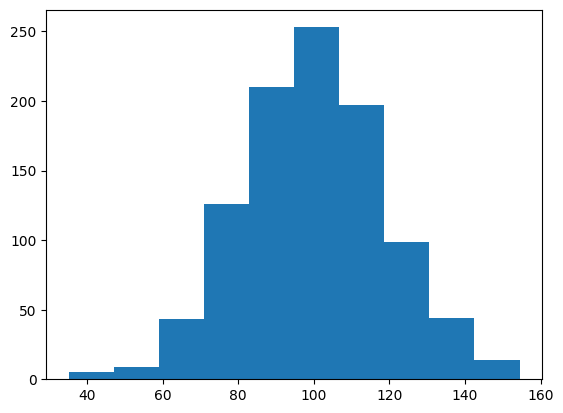

In [14]:
# 원본 데이터 생성
np.random.seed(42)
population_data = np.random.normal(loc=100, scale=20, size=1000)

# Bootstrap 표본 생성
bootstrap_samples = resample(population_data, replace=True, n_samples=len(population_data))

plt.hist(bootstrap_samples)

# 2-5. confidence interval(신뢰 구간)
- Confidence level(신뢰 수준) : 모집단에서 얻은, '흥미로운 통계량'을 포함할 것으로 예상되는 신뢰 구간의 백분율
- Interval endpoint(구간 끝점) : 신뢰 구간의 시작/끝 point

# 2-6. Normal Distribution(정규 분포)
- error : gap between estimated value between observed value
- Standardize('표준화/정규화'하다.. SQL과 구분하자) : mean을 subtract하고, SV로 devide하다
- z-score : 표준화된 데이터들의 결과
- SV 배수에 따른 분포 : 0(0%) ~ +1(68%) ~ +2(95%) ~ +3(99.7)

((array([-2.46203784, -2.12570747, -1.93122778, -1.79044653, -1.67819304,
         -1.58381122, -1.50174123, -1.42869743, -1.36256869, -1.30191411,
         -1.24570419, -1.19317644, -1.14374949, -1.09696931, -1.05247413,
         -1.00997067, -0.96921765, -0.93001393, -0.89218993, -0.85560121,
         -0.82012357, -0.78564937, -0.75208458, -0.71934648, -0.68736185,
         -0.65606548, -0.62539893, -0.59530962, -0.56574992, -0.53667655,
         -0.50804994, -0.47983378, -0.45199463, -0.42450149, -0.39732558,
         -0.37044003, -0.34381966, -0.31744076, -0.29128096, -0.26531902,
         -0.23953472, -0.21390872, -0.18842244, -0.16305799, -0.13779803,
         -0.1126257 , -0.08752455, -0.06247843, -0.03747145, -0.01248789,
          0.01248789,  0.03747145,  0.06247843,  0.08752455,  0.1126257 ,
          0.13779803,  0.16305799,  0.18842244,  0.21390872,  0.23953472,
          0.26531902,  0.29128096,  0.31744076,  0.34381966,  0.37044003,
          0.39732558,  0.42450149,  0.

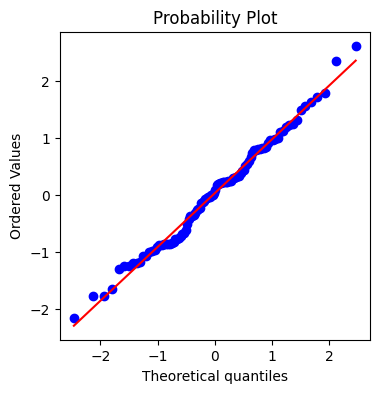

In [17]:
fig, ax = plt.subplots(figsize=(4, 4))
norm_sample = stats.norm.rvs(size=100)
stats.probplot(norm_sample, plot=ax)

# 2-7. Long-tail Distribution
- 대부분의 data는 정규 분포를 따르지 않는다.
- 분포의 끝 부분에는 적은 data들이 길게 분포하는 Tail이 존재한다.
- Skewness(왜도) : 한쪽 꼬리가 반대편 꼬리보다 길고 짧은 정도 (Positive:오른쪽 꼬리가 더 김)

# 2-8. Student's t-distribution (https://youtu.be/UetYS3PaHIo?si=pBq8PlR7jiUoeYgs)
- Goal) 만약 표본에서 '극히 일부의 표본'만 추출해도, 그 표본의 정규 분포 상에서 위치를 알 수 있다면, '적은 추출'에도 불구하고 SD를 추론할 수 있을 것이다
- N이 작어질수록 uncertainty(불확실성)이 증가하고, fat-tail이 생성된다.

# 2-9. Bin Distribution
- trial(시행) ; **독립된 **결과를 가져오는 하나의 사건
- binomial(이항식) : T/F, O/X 처럼 2개의 결과를 갖는다
- 베르누이 분포 : 1번 실행 / 이항 분포 : N(big)번 시행

# 2-10. KAI-제곱 분포
- 표본을 추출하다보면, 기댓값에서 벗어나는 경우가 발생한다.
- 카이제곱통계량은 '변수가 기댓값에서 얼마나 벗어나있는지'를 측정한 통계량
- 관측 데이터의 '적합'한 정도를 판단한다. 0에 가까울수록 적합함

# 2-11. F-Distribution
- KAI는 횟수를 통해서 관측값을 처리하지만, F-분포는 '연속된 관측값'을 이용한다.
- 이 통계량은 '변동성'으로 측정된다.
- ANOVA(ANalysis Of VAriance, 분산분석) : 측정된 변동성을 전체 group과 비교하는 과정
- 선형 모델은 연속된 관측값을 보이는 경우가 많기 때문에, 선형 모델에서 자주 이용된다.

# 2-12. 푸아송 분포
- p가 매우 낮은 경우, 단위 시간 내에 사건이 x번 발생할 확률의 분포
- p가 낮은 경우에는 이항 분포로 표현하기 어렵다.
- Exponential Distribution(지수 분포) : 발생한 사건부터 다음에 발생할 사건까지의 시간/거리의 Distribution
- Webull Distribution : 지수 분포의 일반화된 것